In this notebook i will be using a used car dataset from kaggle and i will be performing linear regrassion algorithms on it to predict the price of a used car
https://www.kaggle.com/ananaymital/us-used-cars-dataset

## Importing libraries and dataset

In [94]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%pylab inline
%config InlineBackend.figure_formats = ['retina']

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk") # talk context is good for RISE presentations

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('used_cars_data.csv')
df

C:\Users\x-x-f\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,2GNAXJEV0J6261526,39.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fairfield,26.0,NaN,...,A,Automatic,t72936,1.5T LT FWD,NaN,FWD,Front-Wheel Drive,107.3 in,72.6 in,2018
3000036,1GNERFKW0LJ225508,38.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,Vallejo,18.0,NaN,...,A,Automatic,t85763,LS FWD,NaN,FWD,Front-Wheel Drive,120.9 in,78.6 in,2020
3000037,3FA6P0HD3GR134062,38.3 in,NaN,NaN,NaN,Sedan,NaN,Napa,NaN,NaN,...,A,6-Speed Automatic Overdrive,t57569,SE,NaN,FWD,Front-Wheel Drive,112.2 in,83.5 in,2016
3000038,SAJAJ4BNXHA968809,35 in,NaN,NaN,NaN,Sedan,NaN,Fairfield,30.0,NaN,...,A,Automatic,t65977,20d Premium AWD,NaN,AWD,All-Wheel Drive,111.6 in,81.7 in,2017


## EDA and Data Cleaning

In [6]:
#code to view all columns when calling df.head(): ---> pd.set_option('display.max_columns', None)

In [4]:
df.shape

(3000040, 66)

In [5]:
df.columns

Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

### Dropping Columns 

In [12]:
#creating a new df (cars) with only the columns we need

cars = df.select_dtypes(exclude=['object']).copy()

cars['make'] = df['make_name']
cars['type'] = df['body_type']

#droping columns that are not considered as car features:
cars = cars.drop('franchise_dealer', 1)
cars = cars.drop('is_certified', 1)
cars = cars.drop('listing_id', 1)
cars = cars.drop('combine_fuel_economy', 1)
cars = cars.drop('vehicle_damage_category', 1)
cars = cars.drop('sp_id',1)
cars = cars.drop('longitude',1)
cars = cars.drop('latitude',1)
cars = cars.drop('seller_rating', 1)
cars = cars.drop('daysonmarket',1)
cars = cars.drop('savings_amount',1)

#keeping only the used cars and removing the new cars
cars = cars[cars['is_new'] == False]

In [15]:
cars.columns

Index(['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy',
       'horsepower', 'is_new', 'mileage', 'owner_count', 'price', 'year',
       'make', 'type'],
      dtype='object')

### Dropping rows with NaN's

In [17]:
cars.dropna(subset = ['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy',
       'horsepower', 'is_new', 'mileage', 'owner_count', 'price', 'year',
       'make', 'type'], inplace = True)

In [133]:
#count column null values
cars['type'].isna().sum()

0

In [87]:
#drop na's in a specific column
#cars = cars.dropna(subset = ['type'])

### #

In [19]:
#showing only cars of type SUP/ Crossover
cars = cars[cars.type.str.contains('SUV / Crossover', case = False)]

In [21]:
cars.reset_index(inplace = True)

In [23]:
cars = cars.drop('index',1)

In [24]:
cars

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,is_new,mileage,owner_count,price,year,make,type
0,18.0,3600.0,27.0,310.0,False,36410.0,1.0,23723.0,2018,Chevrolet,SUV / Crossover
1,15.0,3600.0,22.0,281.0,False,36055.0,1.0,22422.0,2017,Chevrolet,SUV / Crossover
2,18.0,3600.0,25.0,295.0,False,25745.0,1.0,29424.0,2018,Jeep,SUV / Crossover
3,20.0,2400.0,25.0,172.0,False,14607.0,1.0,17000.0,2017,Jeep,SUV / Crossover
4,18.0,3000.0,25.0,241.0,False,16467.0,1.0,25500.0,2017,Jeep,SUV / Crossover
...,...,...,...,...,...,...,...,...,...,...,...
554812,31.0,1600.0,36.0,125.0,False,22270.0,1.0,17700.0,2018,Nissan,SUV / Crossover
554813,26.0,1400.0,31.0,138.0,False,7444.0,1.0,17836.0,2019,Chevrolet,SUV / Crossover
554814,26.0,2500.0,32.0,170.0,False,20160.0,1.0,20700.0,2017,Subaru,SUV / Crossover
554815,26.0,1500.0,32.0,170.0,False,41897.0,1.0,17998.0,2018,Chevrolet,SUV / Crossover


In [79]:
#we could add: 1- back_legroom, wheelbase, width
#but we need to convert them to floats and remove the letters in them
#DONT DO THAT AGAIN, IT ADDED THE COLUMNS AND ADDED ROWS THAT I REMOVED(rows with null values)

In [27]:
# (554817, 11)
cars.shape

(554817, 11)

### Data Organizing

In [ ]:
#remove (type) column and (is_new), then assume all cars are of type SUV/ Crossover, and used (when testing)
#and move price column to the front

In [28]:
cars2 = cars[['city_fuel_economy', 'engine_displacement','highway_fuel_economy','horsepower','mileage','owner_count',
      'price','year','make']]

#move price column to the front
cars2 = cars2[ ['price'] + [col for col in cars2.columns if col != 'price']]

cars2

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,year,make
0,23723.0,18.0,3600.0,27.0,310.0,36410.0,1.0,2018,Chevrolet
1,22422.0,15.0,3600.0,22.0,281.0,36055.0,1.0,2017,Chevrolet
2,29424.0,18.0,3600.0,25.0,295.0,25745.0,1.0,2018,Jeep
3,17000.0,20.0,2400.0,25.0,172.0,14607.0,1.0,2017,Jeep
4,25500.0,18.0,3000.0,25.0,241.0,16467.0,1.0,2017,Jeep
...,...,...,...,...,...,...,...,...,...
554812,17700.0,31.0,1600.0,36.0,125.0,22270.0,1.0,2018,Nissan
554813,17836.0,26.0,1400.0,31.0,138.0,7444.0,1.0,2019,Chevrolet
554814,20700.0,26.0,2500.0,32.0,170.0,20160.0,1.0,2017,Subaru
554815,17998.0,26.0,1500.0,32.0,170.0,41897.0,1.0,2018,Chevrolet


### Adding dummy variables

In [29]:
cars2['make'].nunique()

43

In [30]:
pd.get_dummies(cars2['make'], drop_first=True).head(5)

,Alfa Romeo,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,...,Pontiac,Porsche,Rolls-Royce,Saab,Saturn,Subaru,Suzuki,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
cars2 = pd.get_dummies(cars2, drop_first = True)
cars2.head(5)

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,year,make_Alfa Romeo,make_Audi,...,make_Pontiac,make_Porsche,make_Rolls-Royce,make_Saab,make_Saturn,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo
0,23723.0,18.0,3600.0,27.0,310.0,36410.0,1.0,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22422.0,15.0,3600.0,22.0,281.0,36055.0,1.0,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29424.0,18.0,3600.0,25.0,295.0,25745.0,1.0,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17000.0,20.0,2400.0,25.0,172.0,14607.0,1.0,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25500.0,18.0,3000.0,25.0,241.0,16467.0,1.0,2017,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
cars2

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,year,make_Alfa Romeo,make_Audi,...,make_Pontiac,make_Porsche,make_Rolls-Royce,make_Saab,make_Saturn,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo
0,23723.0,18.0,3600.0,27.0,310.0,36410.0,1.0,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22422.0,15.0,3600.0,22.0,281.0,36055.0,1.0,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29424.0,18.0,3600.0,25.0,295.0,25745.0,1.0,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17000.0,20.0,2400.0,25.0,172.0,14607.0,1.0,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25500.0,18.0,3000.0,25.0,241.0,16467.0,1.0,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554812,17700.0,31.0,1600.0,36.0,125.0,22270.0,1.0,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
554813,17836.0,26.0,1400.0,31.0,138.0,7444.0,1.0,2019,0,0,...,0,0,0,0,0,0,0,0,0,0
554814,20700.0,26.0,2500.0,32.0,170.0,20160.0,1.0,2017,0,0,...,0,0,0,0,0,1,0,0,0,0
554815,17998.0,26.0,1500.0,32.0,170.0,41897.0,1.0,2018,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regrassion

In [33]:
#the highest corelation is with horsepower: 0.54 and year: 0.52
cars2.corr()

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,year,make_Alfa Romeo,make_Audi,...,make_Pontiac,make_Porsche,make_Rolls-Royce,make_Saab,make_Saturn,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo
price,1.000000,-0.166687,0.277386,-0.198428,0.542288,-0.519281,-0.328933,0.520525,0.024946,0.074348,...,-0.023395,0.109627,0.127440,-0.008688,-0.044675,-0.044784,-0.028337,0.000393,-0.002909,0.049404
city_fuel_economy,-0.166687,1.000000,-0.744992,0.925301,-0.691586,-0.326883,-0.250477,0.338422,0.015595,-0.015974,...,-0.013219,-0.036109,-0.010040,-0.011154,-0.021040,0.153979,-0.009133,0.072021,-0.014145,0.002952
engine_displacement,0.277386,-0.744992,1.000000,-0.746568,0.772562,0.269653,0.192573,-0.241922,-0.033799,-0.059834,...,0.007674,0.026480,0.019841,0.010802,0.007089,-0.095343,-0.007094,0.029281,-0.052021,-0.063962
highway_fuel_economy,-0.198428,0.925301,-0.746568,1.000000,-0.689631,-0.343544,-0.269191,0.376174,0.011743,-0.014058,...,-0.013108,-0.048096,-0.007940,-0.012264,-0.018194,0.155636,-0.014097,0.022831,-0.031080,0.001224
horsepower,0.542288,-0.691586,0.772562,-0.689631,1.000000,0.038706,0.033871,0.017667,0.021620,0.027124,...,-0.012256,0.092707,0.023496,0.006571,-0.008282,-0.154019,-0.019177,-0.077104,-0.045269,0.047412
mileage,-0.519281,-0.326883,0.269653,-0.343544,0.038706,1.000000,0.570495,-0.827237,-0.028024,-0.021301,...,0.032964,-0.013019,-0.005649,0.011900,0.060440,0.009030,0.030615,0.036651,-0.047197,-0.005204
owner_count,-0.328933,-0.250477,0.192573,-0.269191,0.033871,0.570495,1.000000,-0.604994,-0.015983,-0.003251,...,0.025697,0.008336,-0.002324,0.009054,0.048694,-0.017540,0.021469,-0.016805,-0.019315,-0.004989
year,0.520525,0.338422,-0.241922,0.376174,0.017667,-0.827237,-0.604994,1.000000,0.021359,0.014377,...,-0.044298,0.000284,0.004571,-0.017363,-0.083672,-0.008797,-0.052116,-0.041121,0.041109,0.002247
make_Alfa Romeo,0.024946,0.015595,-0.033799,0.011743,0.021620,-0.028024,-0.015983,0.021359,1.000000,-0.004303,...,-0.000607,-0.002238,-0.000193,-0.000277,-0.001184,-0.005559,-0.000767,-0.009973,-0.004607,-0.003413
make_Audi,0.074348,-0.015974,-0.059834,-0.014058,0.027124,-0.021301,-0.003251,0.014377,-0.004303,1.000000,...,-0.001904,-0.007021,-0.000604,-0.000868,-0.003713,-0.017437,-0.002407,-0.031286,-0.014451,-0.010706


### Spliting the data

In [47]:
#seperating the target variable (price) in a different dataframe and spliting the dataset to 60% train, 20% validation,
#20% testing
num_cols = [ 'city_fuel_economy', 'engine_displacement',
       'highway_fuel_economy', 'horsepower', 'mileage', 'owner_count', 'year']

X = cars2.drop('price', axis = 1)
y = cars2['price']

#80% train(X,y) and 20% test(X_test, y_test)
X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 10)

#60% train(X_train, y_train) and 20% validation(X_val, y_val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 10)

### Experiments: finding the best model

### 1)

In [60]:
#experiment 1: baseline model without dummy, with sklearn
lm = LinearRegression()
lm.fit(X_train[num_cols], y_train)

print('On training:' ,lm.score(X_train[num_cols], y_train))

print('On validation:' ,lm.score(X_val[num_cols], y_val))


On training: 0.5836892817087369
On validation: 0.6791359080111541


### 2)

In [62]:
#experiment 2: baseline model with dummy, with sklearn
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

print('On training:',lm2.score(X_train, y_train))

print('On validation:',lm2.score(X_val, y_val))


On training: 0.6715071486659262
On validation: 0.7826851395496667


In [104]:
sum(y_train <= 0)

0

Text(0.5, 1.0, 'baseline model with dummy (On training)')

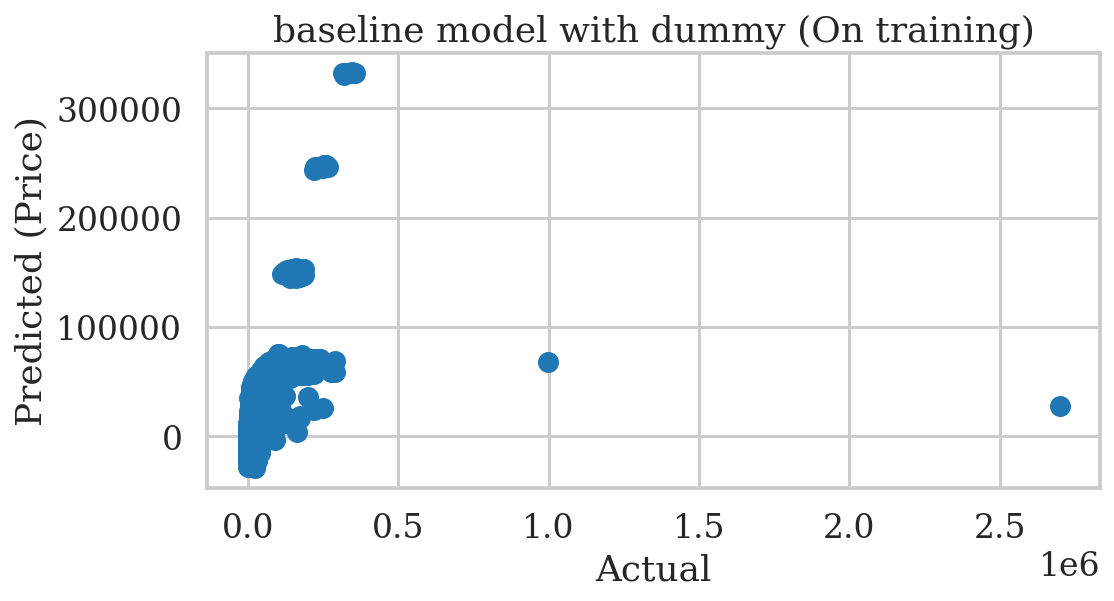

In [126]:
plt.figure(figsize=(8,4))
train_pred = lm2.predict(X_train)
plt.scatter(y_train, train_pred );

plt.xlabel('Actual')
plt.ylabel('Predicted (Price)')
plt.title('baseline model with dummy (On training)')

In [137]:
lm2.predict(X_val)

array([38742.78615268, 27378.11025415, 18243.85266287, ...,
       54030.29619714, 23029.55637791, 27876.4615408 ])

In [138]:
y_val

377240    44900.0
166882    26249.0
105459    18999.0
321110    12900.0
306079    24895.0
           ...   
443793    60491.0
128045    44405.0
550821    44888.0
274815    19997.0
463053    17499.0
Name: price, Length: 110964, dtype: float64

Text(0.5, 1.0, 'baseline model with dummy (On validation)')

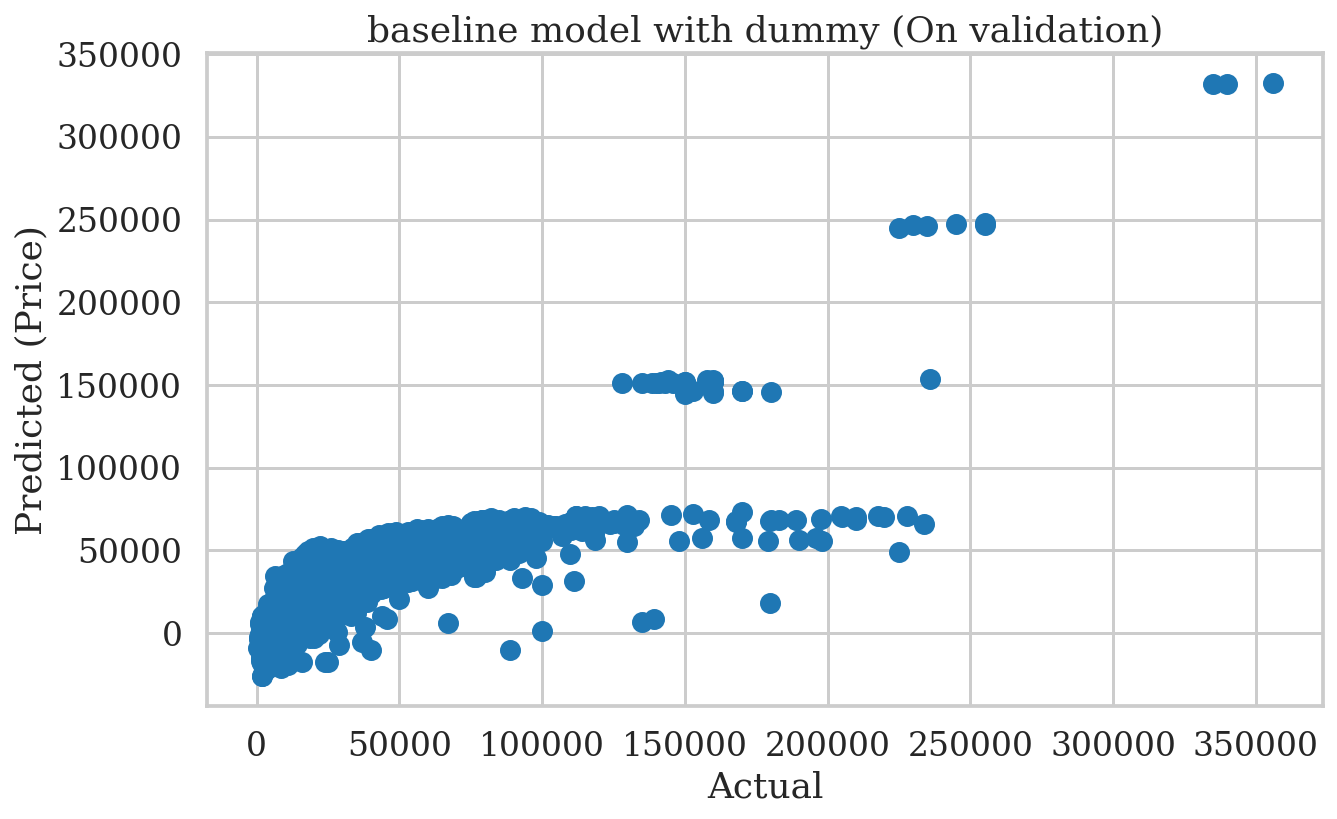

In [129]:
plt.figure(figsize=(10,6))
val_pred = lm2.predict(X_val)
plt.scatter(y_val, val_pred );

plt.xlabel('Actual')
plt.ylabel('Predicted (Price)')
plt.title('baseline model with dummy (On validation)')

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_train, lm2.predict(X_train));

with dummy DONE , cross val with dummy DONE, poly on num only DONE, poly with dummy DONE, laso on output of poly

### 3)

In [71]:
#experiment 3: polynomial without dummy
pf = PolynomialFeatures(2)

X_train_num_poly = pf.fit_transform(X_train[num_cols])

X_val_num_poly = pf.transform(X_val[num_cols])

In [75]:
#experiment 3: polynomial without dummy
# this is much better 
lm3 = LinearRegression()
lm3.fit(X_train_num_poly, np.log(y_train)) #why use log?

print('On training score:', lm3.score(X_train_num_poly, np.log(y_train)))

print('On validation score:', lm3.score(X_val_num_poly, np.log(y_val)))

On training score: 0.8413987918477785
On validation score: 0.8423540807952219


### 4)

In [77]:
#experiment 4: polynomial with dummy variables
pf2 = PolynomialFeatures(2)

X_train_poly_dummy = pf2.fit_transform(X_train)

X_val_poly_dummy = pf2.transform(X_val)

In [79]:
#experiment 4: polynomial with dummy variables
#this is even better with a score of 0.90 on validation
lm4 = LinearRegression()
lm4.fit(X_train_poly_dummy, np.log(y_train))

print('On training score:', lm4.score(X_train_poly_dummy, np.log(y_train)))

print('On validation score:', lm4.score(X_val_poly_dummy, np.log(y_val)))

On training score: 0.9129834363131055
On validation score: 0.9014069544826142


Text(0.5, 1.0, 'polynomial degree 2 (On training) ')

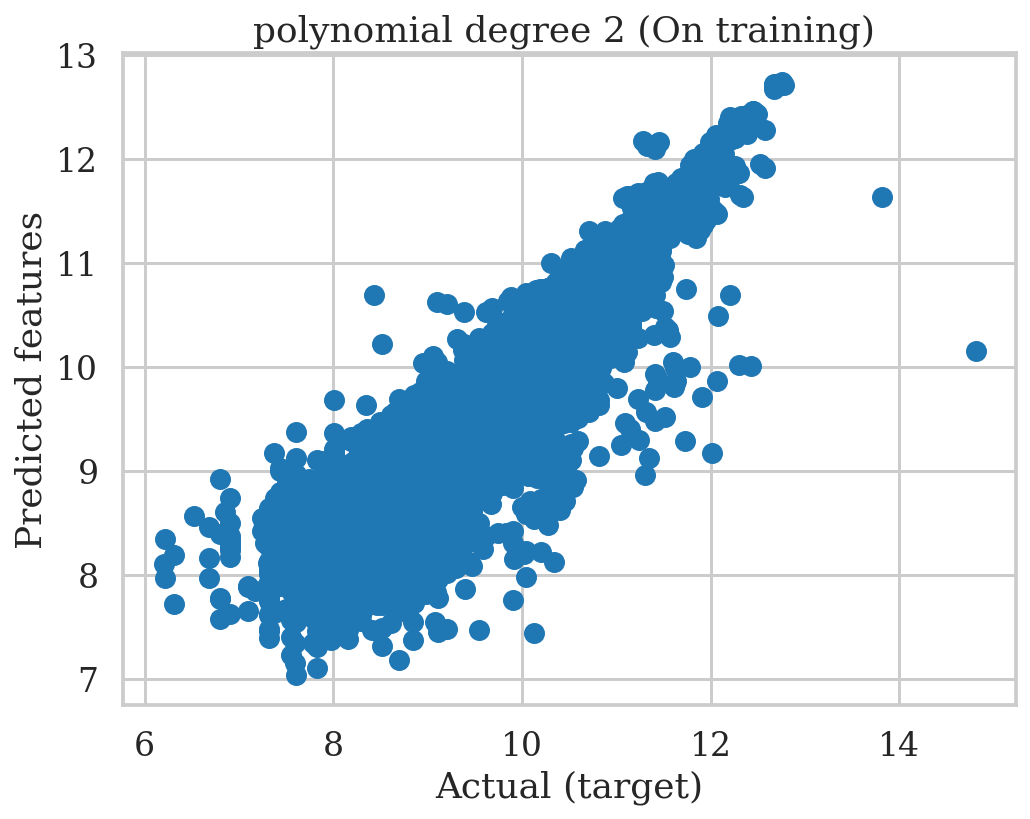

In [130]:
plt.figure(figsize=(8,6))
train_pred2 = lm4.predict(X_train_poly_dummy)
plt.scatter(np.log(y_train), train_pred2 );

plt.xlabel('Actual (target)')
plt.ylabel('Predicted features')
plt.title('polynomial degree 2 (On training) ')

Text(0.5, 1.0, 'polynomial degree 2 (On validation) ')

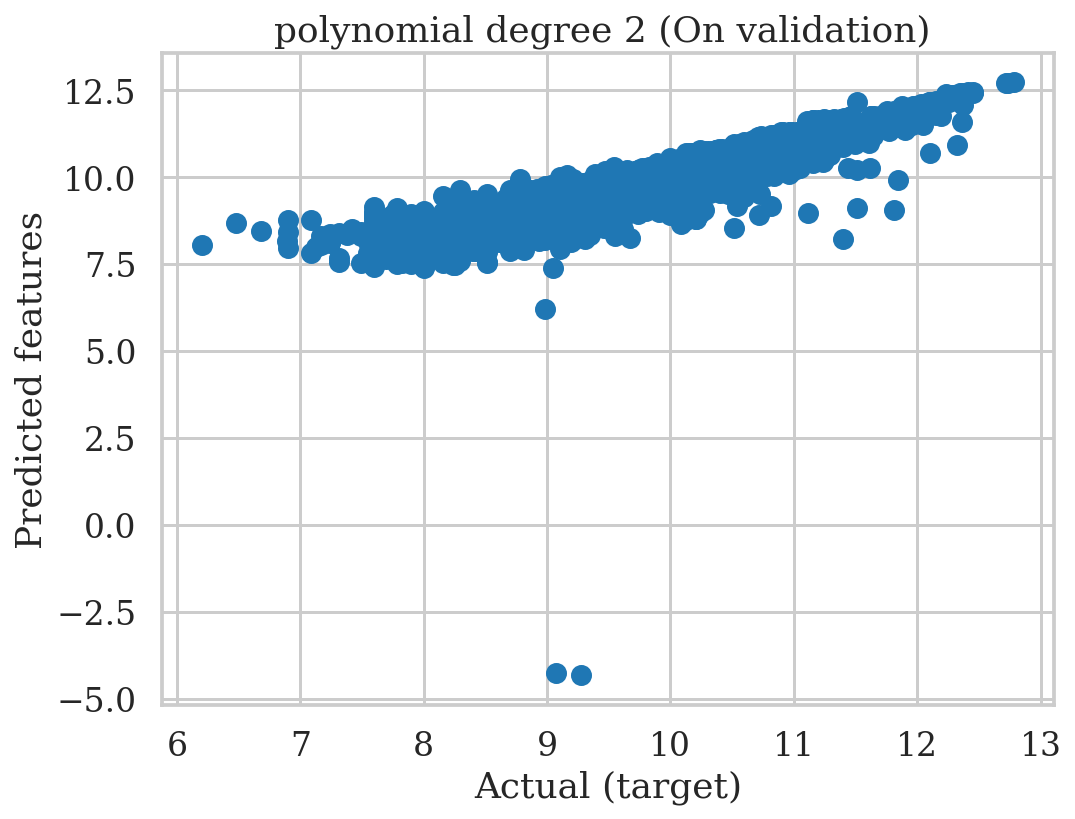

In [131]:
plt.figure(figsize=(8,6))
val_pred2 = lm4.predict(X_val_poly_dummy)
plt.scatter(np.log(y_val), val_pred2 );

plt.xlabel('Actual (target)')
plt.ylabel('Predicted features')
plt.title('polynomial degree 2 (On validation) ')

### 5)

In [83]:
#experiment 5: using cross validation with dummy variables

#combining the train and val = 80% of the data
X_train_val_concat = np.concatenate([X_train, X_val])

y_train_val_concat = np.concatenate([y_train, y_val])

In [84]:
#experiment 5: using cross validation with dummy variables
kf = KFold(n_splits = 5, shuffle = True, random_state = 1000) 

print('with kfolds:', np.mean(cross_val_score(LinearRegression(), X_train_val_concat, y_train_val_concat, cv = kf, scoring = 'r2')))

with kfolds: 0.7163954471001389


### 6)

In [91]:
#Expetiment 6: lasso on polynomial with dummy variables

def lasso_model(X_train, y_train, X_val, y_val, regular_var = 1, #regular_var, cv_flag....?
                CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
        print("mean error:", m.mse_path_)
    else:
        m = Lasso(alpha = regular_var) 
        m.fit(X_train, y_train )

        print("training score :", round(m.score(X_train,y_train) ,5))
        print("val score :", round(m.score(X_val,y_val),5))
    return m

In [92]:
#Expetiment 6: lasso on previous poly

expr6 = lasso_model(X_train_poly_dummy, np.log(y_train), X_val_poly_dummy, np.log(y_val), regular_var = 1000 )

training score : 0.77887
val score : 0.77813


In [36]:
lm.coef_

array([ 7.52013218e+02,  1.21058936e+00, -9.07775843e+02,  7.09861807e+01,
       -8.89382687e-02, -3.19197374e+02,  1.18015087e+03,  6.19379598e+02,
        5.76742498e+03,  5.03914780e+03,  9.34833218e+04, -1.56285224e+03,
        6.77890032e+02, -1.19777049e+03, -2.29866517e+03, -6.32165447e+03,
       -3.87013458e+03, -3.60012967e+03, -2.54893652e+03,  2.03014024e+03,
        2.64029275e+03, -3.13015845e+03, -2.02397903e+03,  4.34819243e+03,
        6.85005565e+03, -4.39734503e+02, -5.01536368e+03,  1.82499745e+05,
        1.03018228e+04,  3.91233674e+03, -2.00870281e+03,  3.20163686e+03,
        1.44375352e+04, -8.94739801e+02,  7.15975818e+03, -2.68870312e+02,
       -4.22764783e+03, -3.04769735e+03,  2.26890185e+03,  2.61179069e+03,
        1.25693751e+04,  2.73398696e+05, -8.56307222e+03,  5.00868308e+02,
        2.54429008e+03,  1.93373422e+03,  1.21762464e+03, -2.21539335e+03,
        4.01016448e+03])

In [37]:
#what?
lm.intercept_

-2362022.851987562

In [38]:
cars2.describe()

,price,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,year,make_Alfa Romeo,make_Audi,...,make_Pontiac,make_Porsche,make_Rolls-Royce,make_Saab,make_Saturn,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo
count,5.548170e+05,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,...,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000,554817.000000
mean,2.328480e+04,20.090942,2947.421042,26.510156,245.496245,54839.848664,1.422606,2016.121074,0.001370,0.013318,...,0.000269,0.003639,0.000027,0.000056,0.001020,0.022031,0.000429,0.067613,0.015236,0.008421
std,1.286211e+04,4.190084,1009.632182,4.263118,70.263386,44364.324504,0.796338,3.426844,0.036986,0.114632,...,0.016386,0.060215,0.005200,0.007475,0.031924,0.146783,0.020707,0.251081,0.122489,0.091378
min,4.950000e+02,9.000000,1000.000000,11.000000,97.000000,25.000000,1.000000,1984.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.599000e+04,17.000000,2000.000000,24.000000,181.000000,24532.000000,1.000000,2015.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.099500e+04,20.000000,2500.000000,27.000000,245.000000,38664.000000,1.000000,2017.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.890000e+04,22.000000,3500.000000,30.000000,290.000000,76687.000000,2.000000,2018.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.698500e+06,67.000000,8100.000000,70.000000,707.000000,389607.000000,12.000000,2021.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
cars2.columns

Index(['price', 'city_fuel_economy', 'engine_displacement',
       'highway_fuel_economy', 'horsepower', 'mileage', 'owner_count', 'year',
       'make_Alfa Romeo', 'make_Audi', 'make_BMW', 'make_Bentley',
       'make_Buick', 'make_Cadillac', 'make_Chevrolet', 'make_Chrysler',
       'make_Dodge', 'make_FIAT', 'make_Ford', 'make_GMC', 'make_Honda',
       'make_Hummer', 'make_Hyundai', 'make_INFINITI', 'make_Isuzu',
       'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Lamborghini',
       'make_Land Rover', 'make_Lexus', 'make_Lincoln', 'make_MINI',
       'make_Maserati', 'make_Mazda', 'make_Mercedes-Benz', 'make_Mercury',
       'make_Mitsubishi', 'make_Nissan', 'make_Oldsmobile', 'make_Pontiac',
       'make_Porsche', 'make_Rolls-Royce', 'make_Saab', 'make_Saturn',
       'make_Subaru', 'make_Suzuki', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'],
      dtype='object')

In [50]:
#using statsmodels
# why is the R-squared different
#y, X = patsy.dmatrices('price ~ city_fuel_economy + engine_displacement + highway_fuel_economy + horsepower + mileage + owner_count + year + make_Alfa Romeo + make_Audi + make_BMW + make_Bentley + make_Buick + make_Cadillac + make_Chevrolet + make_Chrysler + make_Dodge + make_FIAT + make_Ford + make_GMC + make_Honda + make_Hummer + make_Hyundai + make_INFINITI + make_Isuzu + make_Jaguar + make_Jeep + make_Kia + make_Lamborghini + make_Land Rover + make_Lexus + make_Lincoln + make_MINI + make_Maserati + make_Mazda + make_Mercedes-Benz + make_Mercury + make_Mitsubishi + make_Nissan make_Oldsmobile make_Pontiac make_Porsche make_Rolls-Royce make_Saab make_Saturn make_Subaru make_Suzuki make_Toyota make_Volkswagen
  #     make_Volvo, data=cars2, return_type="dataframe")


cars_model = sm.OLS(y_train, X_train[num_cols], data = cars2 )

results = cars_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          4.098e+05
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                        0.00
Time:                        16:08:23   Log-Likelihood:                     -3.4894e+06
No. Observations:              332889   AIC:                                  6.979e+06
Df Residuals:                  332882   BIC:                                  6.979e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
city_fuel_economy      950.7653      9.730     97.717      0.000     931.695     969.835
engine_displacement     -0.1506      0.027     -5.531      0.000      -0.204      -0.097
highway_fuel_economy  -800.0493      9.657    -82.845      0.000    -818.977    -781.121
horsepower             110.5888      0.377    293.123      0.000     109.849     111.328
mileage                 -0.1434      0.000   -326.520      0.000      -0.144      -0.143
owner_count           -945.8828     22.990    -41.143      0.000    -990.942    -900.823
year                     3.9216      0.116     33.889      0.000       3.695       4.148
==============================================================================
Omnibus:                  1307576.952   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   10816887498979.742
Skew:                          95.654   Prob(JB):                         0.00
Kurtosis:                   27928.237   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""